<a href="https://colab.research.google.com/github/fatimabalig/CODSOFT/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import subprocess
#command to unzip the file
command='unzip "/content/archive (4).zip"'

#execute the command
subprocess.call(command,shell=True)

0

In [4]:
# Load the dataset
data=pd.read_csv('/content/spam.csv',encoding='latin-1')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Display summary statistics and check for missing values
print("\nDataset summary statistics:")
print(data.describe())
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Dataset summary statistics:
          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2  

Missing values in the dataset:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [6]:
# Drop any columns other than 'v1' and 'v2'
data = data[['v1', 'v2']]

# Rename the columns for better understanding
data.columns = ['label', 'message']

# Display the first few rows after renaming
print("\nFirst few rows after renaming columns:")
data.head()


First few rows after renaming columns:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Encode the labels
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Display the size of the training and test sets
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 4457
Test set size: 1115


In [8]:
# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [9]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train_tfidf, y_train)

# Train Support Vector Machine model
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, y_train)

SVC(probability=True)

In [10]:
# Function to print evaluation metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}')

# Evaluate Naive Bayes
print('Naive Bayes:')
evaluate_model(nb_model, X_test_tfidf, y_test)

# Evaluate Logistic Regression
print('\nLogistic Regression:')
evaluate_model(lr_model, X_test_tfidf, y_test)

# Evaluate Support Vector Machine
print('\nSupport Vector Machine:')
evaluate_model(svm_model, X_test_tfidf, y_test)


Naive Bayes:
Confusion Matrix:
[[965   0]
 [ 37 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

ROC AUC Score: 0.9815198618307428

Logistic Regression:
Confusion Matrix:
[[964   1]
 [ 35 115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

ROC AUC Score: 0.98460103626943

Support Vector Machine:
Confusion Matrix:
[[965   0]
 [ 22 128]]

Classification Report:
              precision  

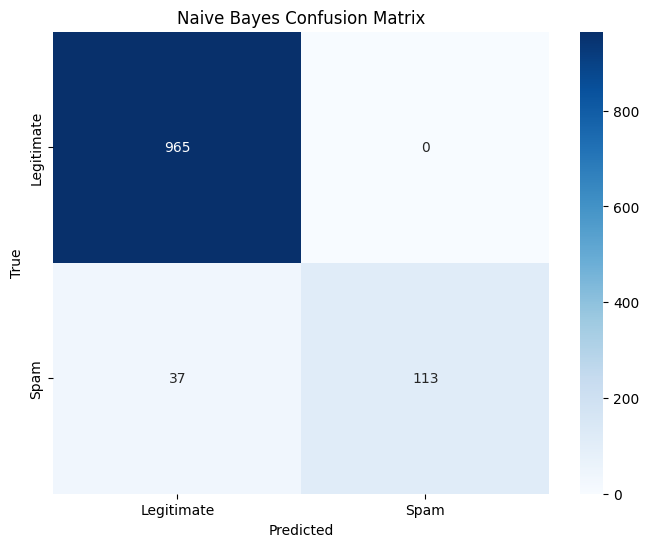

In [15]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Spam'], yticklabels=['Legitimate', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(nb_model, X_test_tfidf, y_test, 'Naive Bayes Confusion Matrix')


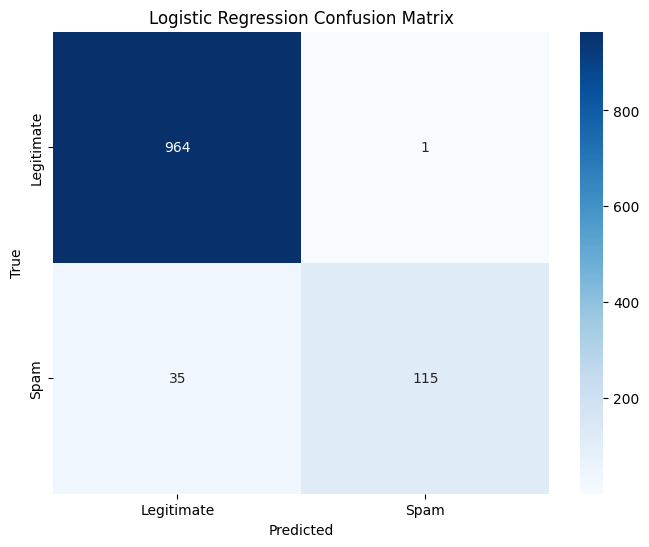

In [13]:
plot_confusion_matrix(lr_model, X_test_tfidf, y_test, 'Logistic Regression Confusion Matrix')

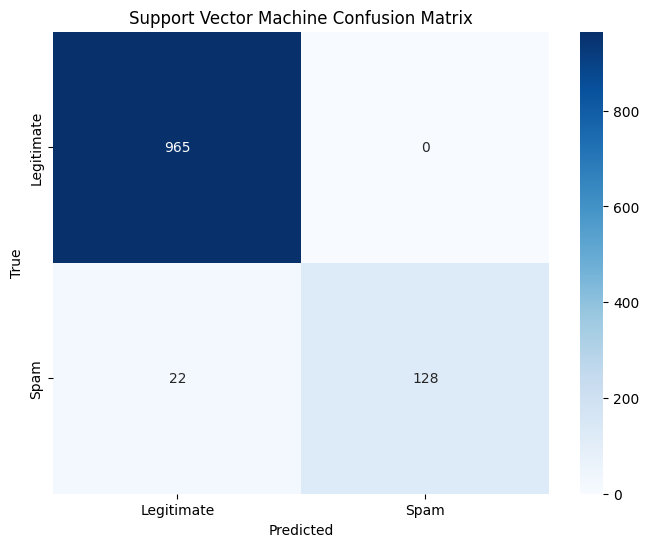

In [14]:
plot_confusion_matrix(svm_model, X_test_tfidf, y_test, 'Support Vector Machine Confusion Matrix')

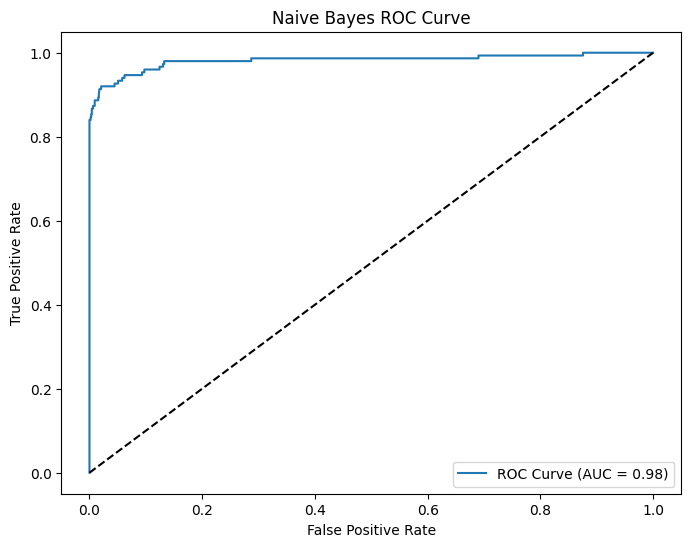

In [18]:
# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, title):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

# Plot ROC curves
plot_roc_curve(nb_model, X_test_tfidf, y_test, 'Naive Bayes ROC Curve')

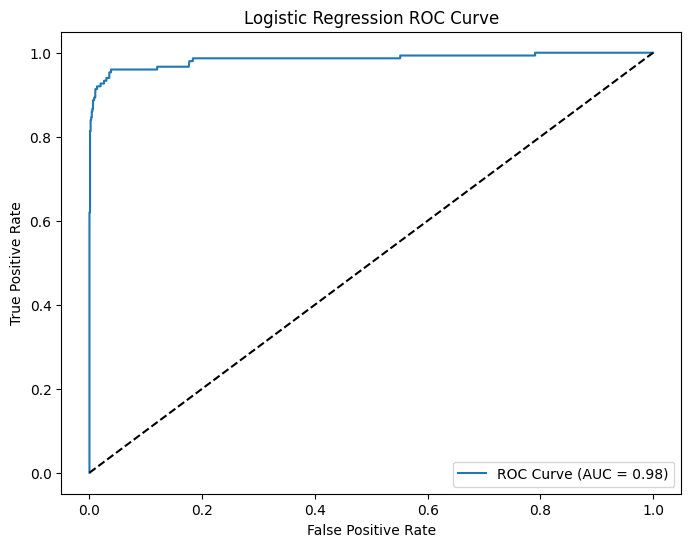

In [16]:
plot_roc_curve(lr_model, X_test_tfidf, y_test, 'Logistic Regression ROC Curve')

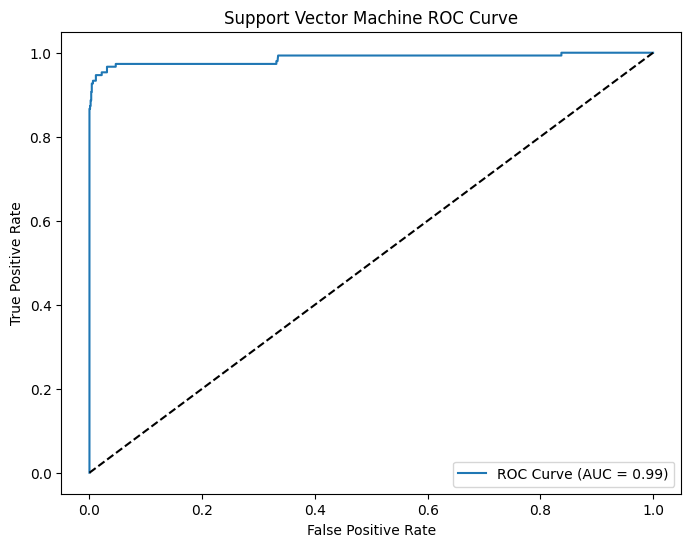

In [17]:
plot_roc_curve(svm_model, X_test_tfidf, y_test, 'Support Vector Machine ROC Curve')